# Machine Learning

1. **Supervised Machine Learning**  
2. **Unsupervised Machine Learning**  
3. **Reinforcement Learning**  

---

## 1. Supervised Machine Learning  

Supervised learning is a type of machine learning where the model learns from a **labeled dataset** — meaning the input data is paired with the correct output. The algorithm’s goal is to learn the mapping from inputs to outputs so it can make predictions on unseen data.

### Types of Supervised Machine Learning

#### **A. Classification**
- **Goal:** To classify or predict categorical values.  
- **Examples:**
  - Spam filtering (Email classification)  
  - Disease prediction (e.g., Heart Disease, COVID-19)  
  - Digit recognition from images (e.g., using Neural Networks)  

---

### Algorithms for Classification

- **Logistic Regression:** Used for binary classification tasks.  
- **Decision Tree:** Provides decisions based on the most significant features.  
- **Random Forest:** An ensemble method combining multiple decision trees to improve accuracy and reduce overfitting.  
- **Support Vector Machine (SVM):** Uses a hyperplane to separate data into different classes.  
- **Naive Bayes:** Based on Bayes’ theorem; works on the probability of features assuming independence.  
- **K-Nearest Neighbour (KNN):** A non-parametric algorithm that classifies data based on the majority class among the nearest neighbors.  
- **Neural Networks:** Complex classification models used in CNNs, RNNs, GANs, etc.  
- **Gradient Boosting:** An ensemble method that builds decision trees sequentially, correcting errors from previous models.  
- **Imbalanced Classification Techniques:** Used when one class in the dataset significantly outnumbers the other(s).  

---


In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Roshan/Desktop/Machine learning/Machine-Learning/Roshan saud/heart.csv")


In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# number of rows and columns in dataset
a, b = df.shape
print(f"Data status (Row: {a}, Columns: {b})")


Data status (Row: 1025, Columns: 14)


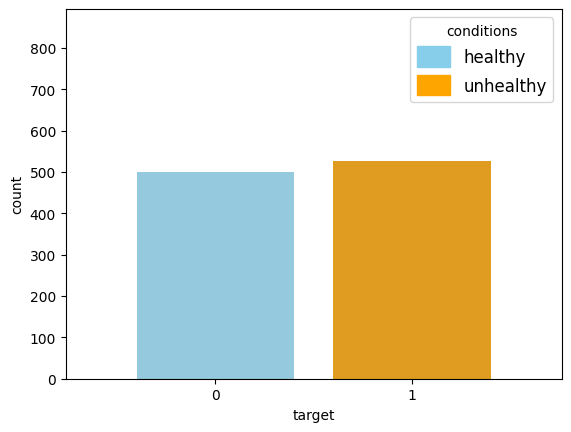

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#Plot 
sns.countplot(x='target', hue='target',data=df, palette=['skyblue', 'orange'])

healthy = mpatches.Patch(color='skyblue', label='healthy')
unhealthy = mpatches.Patch(color='orange', label='unhealthy')

plt.legend(handles=[healthy, unhealthy], title='conditions', fontsize=12, handlelength=2, handleheight=1.5)
plt.margins(x=0.2, y=0.7)
plt.show()

<Axes: >

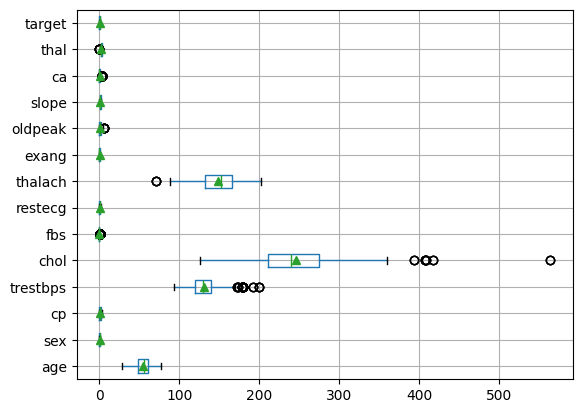

In [7]:
from pandas.plotting import scatter_matrix
df.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg","thalach",
               "exang", "oldpeak", "slope", "ca","thal","target"]

# Horizontal boxplot
df.boxplot(column=list(df.columns), showmeans=True, vert=False)

In [ ]:
# Scatter matrix
scatter_matrix(df.drop(columns=["target"]), figsize=(15,15))
plt.show()

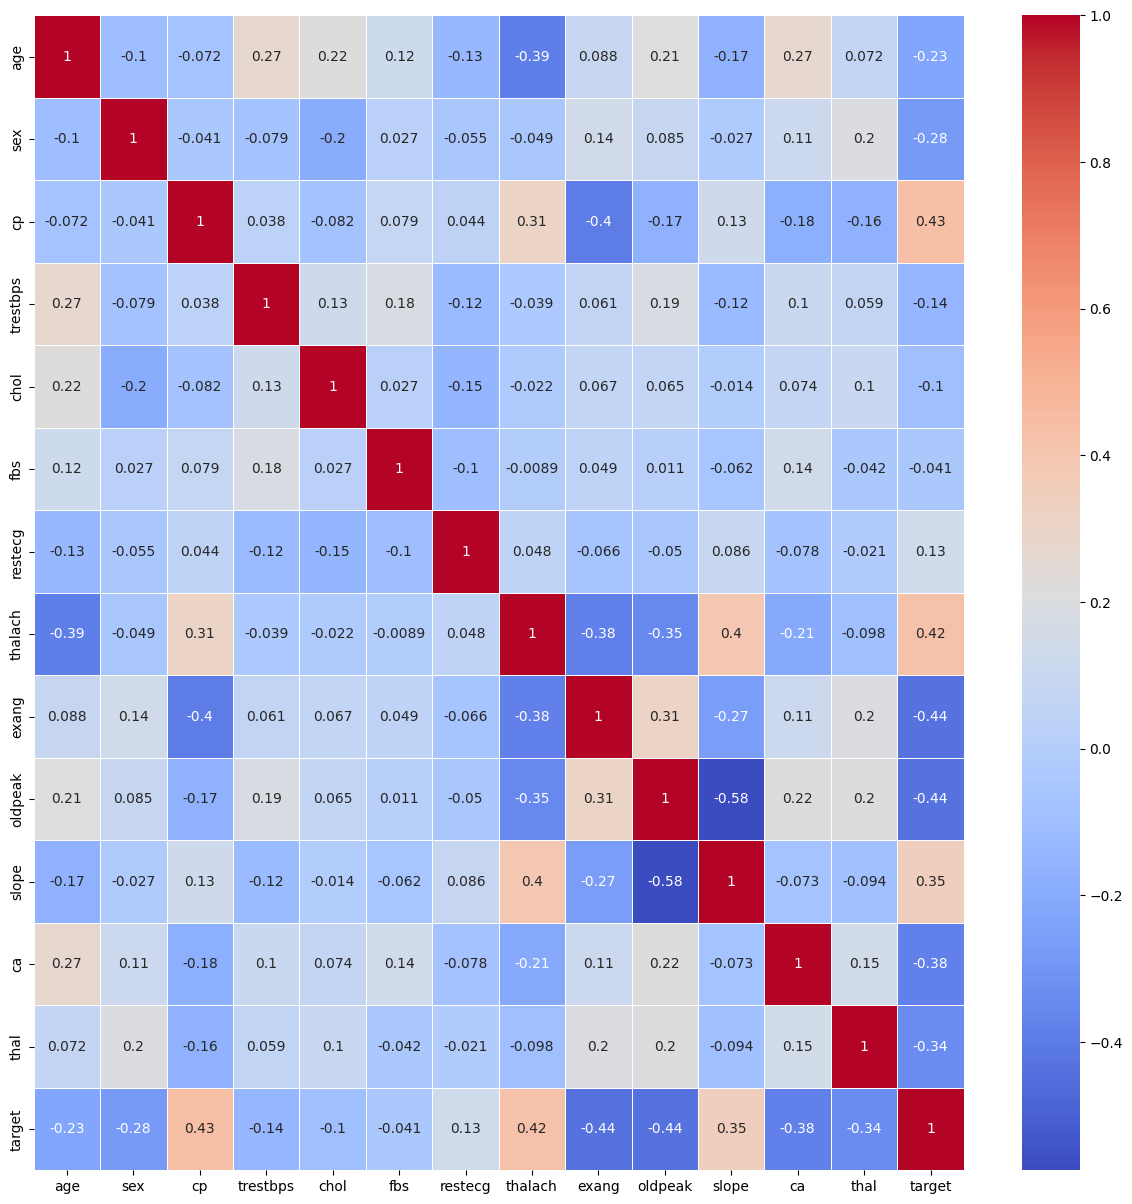

In [ ]:
corrMatrix = df.corr()
dif, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=0.5, cmap="coolwarm", ax=ax)
plt.show()

# Model Training

## Train Test Split
- In supervised machine learning algorithm we have a dataset(100K).
- Now we need to split datasets in train and test.
- 80% for training and 20% for testing (80k for training and 20k for testing).
- We have output in training dataset and data parameters (features(columns)) with labeled output
- In test datasets there is no target columns we validate the model using independent test dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Seperate features from target
x = df.drop('target', axis=1)
y = df['target']
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# Now split dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay)

# We are using multiple classification model and comparing among them
# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print("For training: ")
print(X_train.shape)
print(y_train.shape)

print("For testing")
print(X_test.shape)
print(y_test.shape)


For training: 
(820, 13)
(820,)
For testing
(205, 13)
(205,)


# Model training 
- We use dataset that are splited into train and test inside different classification models. Model compute target result on the basis of train data.
- Here for model evalutaion we perform independent testing among the test datasets.

In [ ]:
# Create model of dictonary 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
     "Decision Tree" : DecisionTreeClassifier(max_depth=3),
     "Random forest": RandomForestClassifier(n_estimators=100),
     "SVM" : SVC(probability=True),
     "kNN" : KNeighborsClassifier()
}


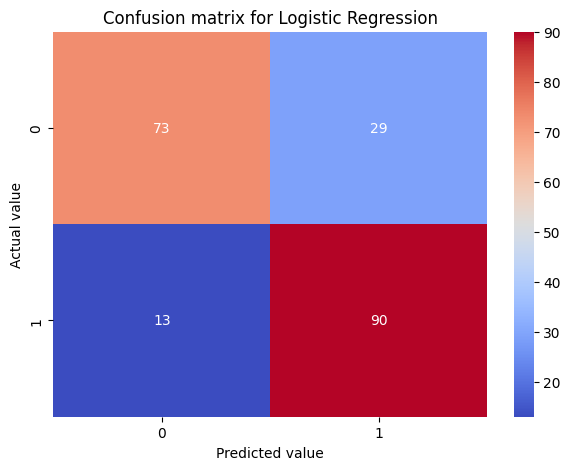

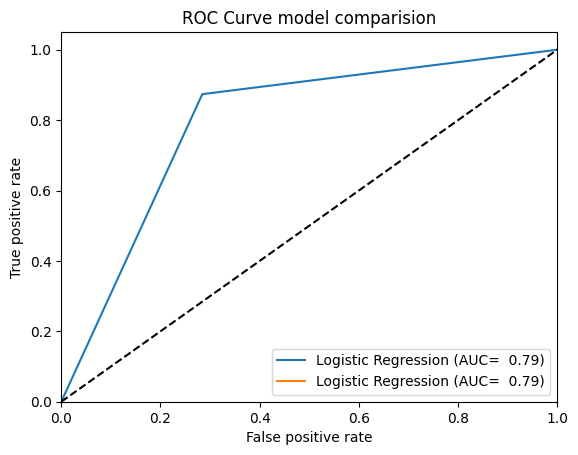

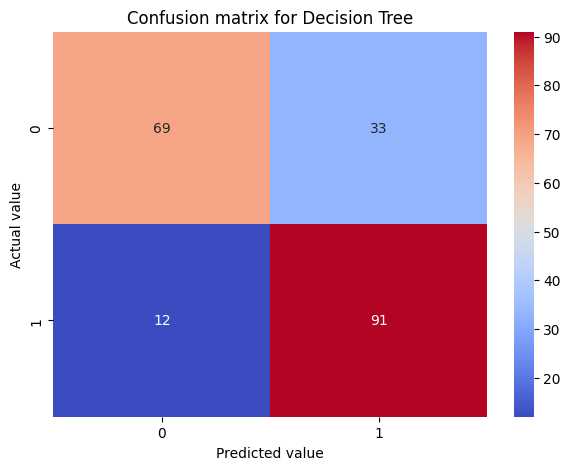

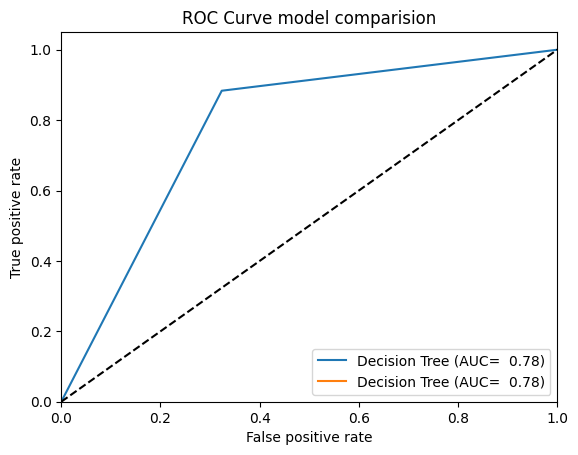

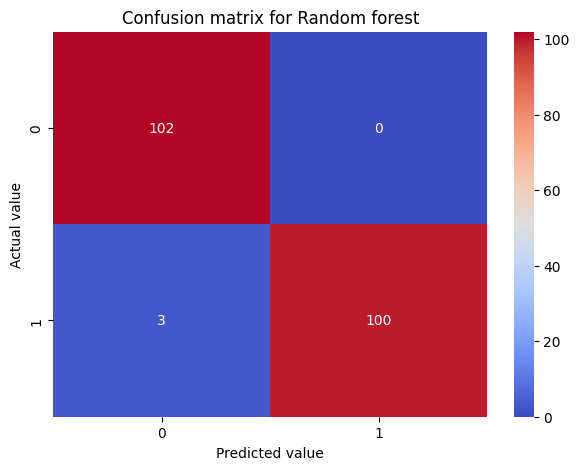

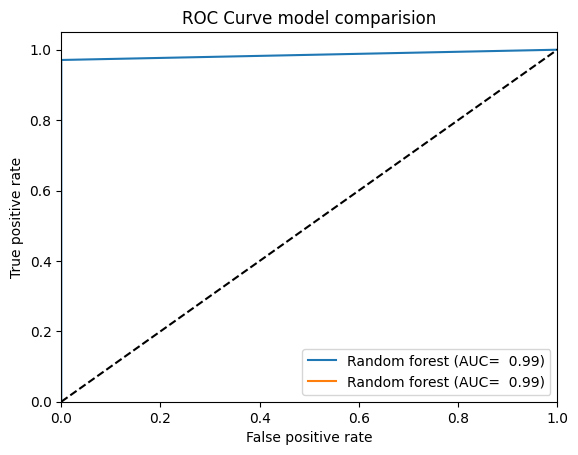

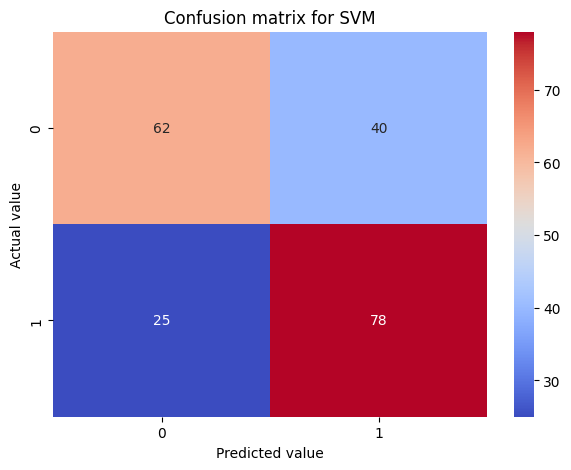

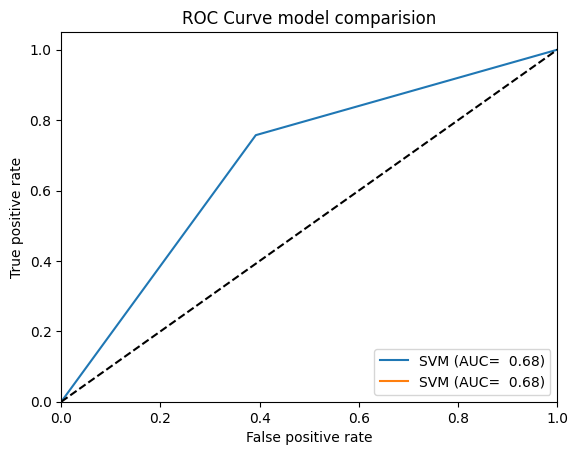

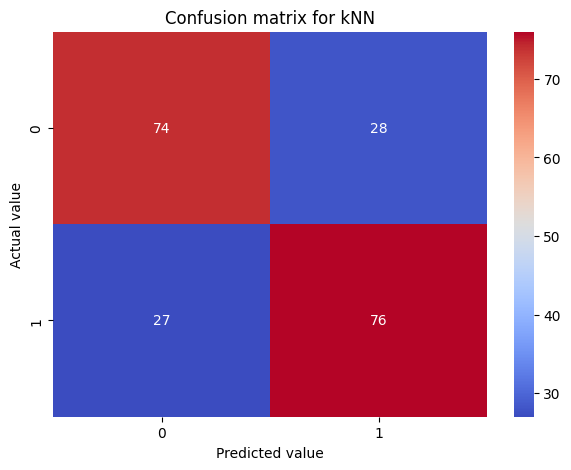

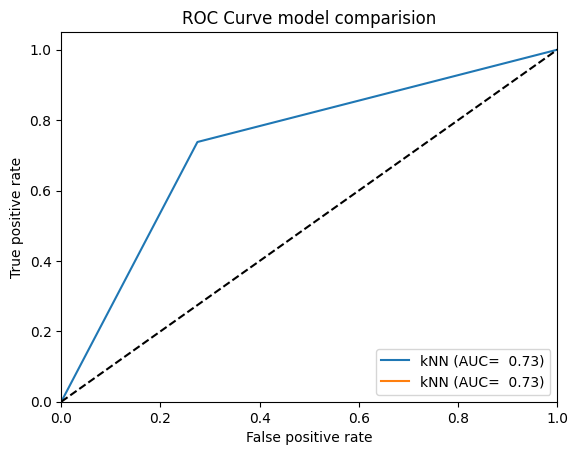

{'Model': 'Logistic Regression', 'Accuracy': 0.7951219512195122, 'Precision': 0.7563025210084033, 'Recall': 0.8737864077669902, 'F1 score': 0.8108108108108109}
{'Model': 'Decision Tree', 'Accuracy': 0.7804878048780488, 'Precision': 0.7338709677419355, 'Recall': 0.883495145631068, 'F1 score': 0.801762114537445}
{'Model': 'Random forest', 'Accuracy': 0.9853658536585366, 'Precision': 1.0, 'Recall': 0.970873786407767, 'F1 score': 0.9852216748768473}
{'Model': 'SVM', 'Accuracy': 0.6829268292682927, 'Precision': 0.6610169491525424, 'Recall': 0.7572815533980582, 'F1 score': 0.7058823529411765}
{'Model': 'kNN', 'Accuracy': 0.7317073170731707, 'Precision': 0.7307692307692307, 'Recall': 0.7378640776699029, 'F1 score': 0.7342995169082126}


In [ ]:
results = []

for name, model in models.items():
    # Train 
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    
    # Metrices 
    # There are multiple metrices like percision, recall, f1 score used to identify the 
    # accuray of ML model 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Harmonic mean of percision and recall

    # Store the results in map
    results.append({
        'Model':name,
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall':recall,
        'F1 score':f1
    })

    # Confusion matrix
    plt.figure(figsize=(7,5))
    plt.title(f"Confusion matrix for {name}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.xlabel("Predicted value")
    plt.ylabel("Actual value")
    plt.show()
   
        # ROC Curve
    # fpr :  x-axis value
    # tpr :  y-axis value
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, roc_auc, label=f"{name} (AUC= {roc_auc: .2f})")

    # ROC CURVE comparision 
    plt.plot([0,1], [0,1], "k--")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.05)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC Curve model comparision")
    plt.legend(loc="lower right")
    plt.show()


for x in results:
    print(x)


In [ ]:
# Model comparision
result_df = pd.DataFrame(results)
print("Model comparision")
display(result_df.sort_values('Accuracy', ascending=False))

Model comparision


,Model,Accuracy,Precision,Recall,F1 score
2,Random forest,0.985366,1.000000,0.970874,0.985222
0,Logistic Regression,0.795122,0.756303,0.873786,0.810811
1,Decision Tree,0.780488,0.733871,0.883495,0.801762
4,kNN,0.731707,0.730769,0.737864,0.734300
3,SVM,0.682927,0.661017,0.757282,0.705882


<Axes: >

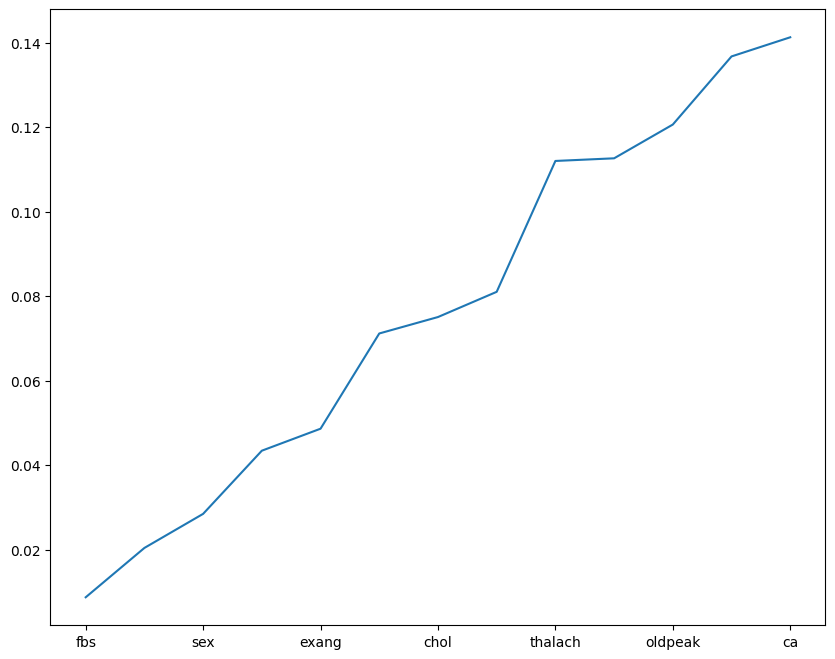

In [ ]:
# Feature importance 

plt.figure(figsize=(10,8))
rf = RandomForestClassifier().fit(X_train, y_train)
pd.Series(rf.feature_importances_, index= X_train.columns).sort_values().plot()